---
---

# 1. Intro & Lit Review

---
---

Our sleep quality is closely tied to our mental and physical wellbeing. Poor sleep quality can lead to numerous health problems, such as obesity [1], epilepsy [2], depression and suicidal ideation [3]. Thus, it is important for us to understand what the causes of poor sleep are, and how we can address them. Predicting sleep is an important step in this direction. If certain signals are found to correlate with the quality of sleep, then we can work to see what is influencing these signals and to change them to improve sleep.
There are two types of approaches typically seen for the topic of sleep prediction, those being: prediction of the quality of a person’s sleep based on data collected on them throughout the course of the day, and prediction of the future sleep state using data collected during sleep.

The first of these approaches we will look at is predicting the quality of a person’s sleep using the data collected on them throughout the course of the day. In [4], they use sleep and sleep-related factors measured during the morning, afternoon and evening periods of the day to predict quality of sleep. In this research, they showed there is a significant correlation between sleep quality and both physical activity and exposure to light. Similarly, in [5], they used wearable sensor data collected while awake to predict sleep efficiency. These kinds of long term predictive models could be used by employers to ensure employees in key, high-risk positions are not fatigued, as studied in [6], and also could be used by medical practitioners to give recommendations to patients about how they can change their lifestyle in order to improve their sleep quality and hence, improve their general health and wellbeing.

The second approach, and perhaps the more interesting one, is the prediction of a person’s sleep state based on data collected on them during that sleep session. The key to this forecasting is first being able to classify the person’s previous and current sleep states. We can then use the data on these classified sleep states to predict the future sleep states. In [7], to classify the sleep stages, they apply a convolutional neural network to multi-channel EEG time series data. They report an average of 92% accuracy across the five stages of sleep, showing that there are ways to accurately classify a person’s sleep state. Using only this kind of classification model, a patient's sleep could be monitored in a retrospective way to help diagnose various disorders such as insomnia, but for our purpose, we would use this model in conjunction with another model to forecast the person’s future sleep pattern in a more proactive fashion.

Being able to forecast sleep a few minutes or hours into the future could prove very useful in certain scenarios. Three of these scenarios are in the case of hospital patients with an emphasis on dementia patients, very young children, and criminals post surgery.
As pointed out in [8] by the UK Alzheimer's Society, people with dementia can have restless sleep and oftentimes, they can wake up in the middle of the night being quite disorientated. This disorientation can result in them doing things they shouldn’t do, like leaving the house in the middle of the night. In cases like this, some sort of warning on the person’s sleep activity would be a great help as it could give a nurse, a spouse or a carer the opportunity to intercept the person and to reassure them. Even in instances outside of the dementia case study, models like this can provide vital information to healthcare staff in hospitals, nursing homes, and elsewhere to greatly improve efficiency of resources and to improve the quality of care for patients.
Prediction of sleep models might also be handy for parents of very young children. We think it would be beneficial to be able to forecast the sleep state of your child in order to be able to plan your day and behaviours better around this. Sometimes, parents limit their activities as they may be unsure whether their child will wake up soon. If we could predict the sleep state and even be able to project a time when the child would wake up, this would offer much more flexibility to parents and give them an oppertunity to plan things more in line with their child's sleep.
There are also cases where the prediction of sleep quality is perhaps too granular and it is the binary sleep vs awake that is important. A situation we identified where this might be the case would be when criminals have a medical procedure. If a criminal gets surgery and is sleeping in their recovery, we would want to be able to inform police when that person is due to wake up so that they can be more alert to a potential escape.

While these three examples are not an exhaustive list of practical applications of a sleep forecasting model, they help to illustrate the wide range of use cases such a technology could have. While there has not been too much research into this area to date, we hope to fill this research void with our work, building on from both previous works on sleep state classification and previous works on prediction of sleep quality using data collected throughout the day.



### References

**1.**   G Beccuti, S Pannain, Sleep and Obesity, 2011. DOI: 10.1097/MCO.0b013e3283479109 

**2.**   B Mallow, Sleep Deprivation and Epilepsy, 2004. DOI: 10.1111/j.1535-7597.2004.04509.X 

**3.**   D Littlewood, S Kyle, L Carter, S Peters, D Pratt, P Gooding, Short sleep duration and poor sleep quality predict next-day suicidal ideation: an ecological momentary assessment study, 2019. DOI: 10.1017/S0033291718001009

**4.**   K Park, S Lee, S Wang, S Kim, S Lee, S Cho, S Park, E Lee, Sleep Prediction Algorithm Based On Deep Learning Technology, 2019. DOI: 10.1093/sleep/zsz067.425 

**5.**   A Sathyanarayana, S Joty, L Fernandez-Luque, F Ofli, J Srivastava, A Elmagarmid, T Arora, S Taheri, Sleep Quality Prediction From Wearable Data Using Deep Learning, 2016. DOI: 10.2196/mhealth.6562 

**6.**   Sahand Hajifar, Hongyue Sun, Fadel M. Megahed, L. Allison Jones-Farmer, Ehsan Rashedi, Lora A. Cavuoto, A forecasting framework for predicting perceived fatigue: Using time series methods to forecast ratings of perceived exertion with features from wearable sensors, 2021. DOI: 10.1016/j.apergo.2020.103262 

**7.**   M Santos, Z Cui, X Zheng, X Shao, L Cui, Automatic Sleep Stage Classification Based on Convolutional Neural Network and Fine-Grained Segments, 2018. DOI: 10.1155/2018/9248410 **

**8.**  Alzheimers Society. https://www.alzheimers.org.uk/about-dementia/symptoms-and-diagnosis/sleep-and-night-time-disturbance

---
---

# 2. Setup

---
---

### Import the relevant packages

In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

### Mount the drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Set the directory for reading in and outputting the data

In [ ]:
#os.chdir('/content/drive/My Drive/College - 4th Year/CA4015_AdvancedML/Assignment_3/new/notebooks/data') # Liam
os.chdir('/content/drive/My Drive/Assignment_3/new/notebooks/data')                                       # Nathan & Adam

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1CNknqtSZpMl1LnBDxjTucYpgXSD_ekVG/Assignment_3/new/notebooks/data


### Set the maximum number of rows and columns seen in the output

In [ ]:
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 25)

### Disable Warning

In [ ]:
pd.options.mode.chained_assignment = None

---
---

# 3. Load, Join & Clean the data

---
---


### Create a function to read in, clean and join the different data sources

In [ ]:
def load_subject_ids(data_folder):
    """
    Create a list containing the subject_id's of all the participants in the study
    """

    subject_ids = []
    for filename in os.listdir(data_folder):
        subject_id = int(filename.split('_')[0])

        # add this to a list of all subject_ids
        subject_ids.append(subject_id)
        
    # remove duplicates and then sort the list
    sorted_subject_ids = sorted(list(set(subject_ids)))

    return sorted_subject_ids

In [ ]:
def load_subjects_cropped_data(data_folder, subject_id):
    """
    For a particular subject, read in the data recorded by their apple watch
    """

    # read in heart rate data
    heart_df = pd.read_csv(os.path.join(data_folder, '{}_cleaned_hr.out'.format(subject_id)), sep=" ", names=["time", "heart_rate"])

    # read in motion data
    motion_df = pd.read_csv(os.path.join(data_folder, '{}_cleaned_motion.out'.format(subject_id)), sep=" ", names=["time", "x_motion", "y_motion", "z_motion"])

    # read in the step count data
    steps_df = pd.read_csv(os.path.join(data_folder, '{}_cleaned_counts.out'.format(subject_id)), names=["time", "step_count"])

    # read in psg sleep label data
    labels_df = pd.read_csv(os.path.join(data_folder, '{}_cleaned_psg.out'.format(subject_id)), sep=" ", names=["time", "sleep_label"])

    # clean the psg data to remove '-1' values - turn values with '-1' to 'nan'
    labels_df = labels_df[labels_df["sleep_label"] != -1]
    
    return heart_df, motion_df, steps_df, labels_df

In [ ]:
def resample(df_to_resample, hz):
    """
    Take in a dataframe of one sensor - eg. |Time|Heart_Rate| - And make the time step interval uniform across all rows
    """
    
    df = df_to_resample.copy()

    df["time"] = pd.to_datetime(df["time"], unit="s")
    df.set_index("time", inplace=True)

    new_index = pd.date_range(0, df.index.max(), freq=f"{1000/hz:.0f}ms")
    df_resampled = df.reindex(df.index.union(new_index)).interpolate().reindex(new_index)

    return df_resampled

In [ ]:
def load_author_data(data_folder, subject_id):
    """
    For a particular subject, read in the features that the author of the study created
    """
    
    # Read in the 5 feature tables defined for each subject_id
    heart_rate_feature_df = pd.read_csv(os.path.join(data_folder, f"{subject_id}_hr_feature.out"), header=None, names=["heart_rate_feature"])
    count_feature_df = pd.read_csv(os.path.join(data_folder, f"{subject_id}_count_feature.out"), header=None, names=["count_feature"])
    time_feature_df = pd.read_csv(os.path.join(data_folder, f"{subject_id}_time_feature.out"), header=None, names=["time_feature"])
    cosine_feature_df = pd.read_csv(os.path.join(data_folder, f"{subject_id}_cosine_feature.out"), header=None, names=["cosine_feature"])
    psg_label_df = pd.read_csv(os.path.join(data_folder, f"{subject_id}_psg_labels.out"), header=None, names=["psg_label"])

    # Convert the time from hours into a timestamp in seconds
    time_feature_df["time"] = pd.to_datetime((time_feature_df["time_feature"]*60*60).apply(lambda t: int(round(t))), unit="s")
    
    subject_features = pd.concat([time_feature_df, heart_rate_feature_df, count_feature_df, cosine_feature_df, psg_label_df], axis=1)

    return subject_features

In [ ]:
def load_and_preprocess_data(cropped_data_folder, author_data_folder, subject_id, hz=1/30):
    """
    For a particular subject:
        1. Read in the cropped sensor data
        2. Fix the time interval for each sensor dataframe to be uniform
        3. Merge all that subjects sensor data into one table

        4. Read in the authors features
        5. Fix the time interval for these features to be uniform
        6. Join these authors features to the merged sensor dataframe created in step 1, 2 & 3

        7. Drop the rows in this dataframe that have an Nan value in one of the specified columns
    """

    # ----------------------
    # ==== CROPPED DATA ====
    # ----------------------

    # Load in the sensor data for this given subject
    heart_df, motion_df, steps_df, labels_df = load_subjects_cropped_data(cropped_data_folder, subject_id)

    # Resample the time column of these sensor dataframes to get a uniform timestamp step
    resampled_dfs = []
    for df in [heart_df, motion_df, steps_df, labels_df]:
        resampled_df = pd.DataFrame(columns=df.columns) if len(df) == 0 else resample(df, hz)
        resampled_dfs.append(resampled_df)

    # Merge these sensor dataframes into one
    all_sensor_df = resampled_dfs[0]
    for _df in resampled_dfs[1:]:
        all_sensor_df = all_sensor_df.merge(_df, how="outer", left_index=True, right_index=True)

    # drop the rows in this dataframe where there is no corresponding sleep state value
    fixed_all_sensor_df = all_sensor_df.dropna(subset=["sleep_label"])

    # Then reset the timestamp index back to 0
    fixed_all_sensor_df.index = (fixed_all_sensor_df.index - fixed_all_sensor_df.index[0]) + pd.Timestamp('1970-01-01 00:00:00')

    # The 'sleep_label' will now contain some float values from the interpolation used in the resampling.
    # As there are now no NAN's in this column, this can be fixed by rounding these floats to integers
    fixed_all_sensor_df["sleep_label"] = fixed_all_sensor_df["sleep_label"].round().astype(int)


    # -----------------------
    # ===== AUTHOR DATA =====
    # -----------------------

    # Load in the features created by th author of the study
    author_feature_df = load_author_data(author_data_folder, subject_id)

    # Resample these features
    resampled_author_df = resample(author_feature_df, hz)

    # The 'psg_label' will now contain some float values from the interpolation used in the resampling.
    # As there are no NAN's in this column, this can be fixed by rounding these floats to integers
    resampled_author_df["psg_label"] = resampled_author_df["psg_label"].round().astype(int)

    # Merge these author features with the rest of the sensor data
    sensor_nd_author_feature_df = fixed_all_sensor_df.merge(resampled_author_df, left_index=True, right_index=True)

    # Take the time out of the index and make it a column
    df = sensor_nd_author_feature_df.reset_index().rename(columns={"index": "time"})

    # Drop the rows that contain NAN values in their heart_rate or one of the motion columns
    no_nan_df = df.dropna(subset=["heart_rate", "x_motion", "y_motion", "z_motion"]).reset_index(drop=True)

    return no_nan_df

In [ ]:
def load_and_clean_all_data(cropped_data_folder, author_data_folder, hz=1/30):
    """
    Create a list of all subjects, then for each subject, create a dataframe of all the sensor data for that subject.
    Then join this dataframe created for each subject into one big dataframe
    """

    # create a list of all the subject_ids
    subject_ids = load_subject_ids(cropped_data_folder)
    
    all_data_df = pd.DataFrame()

    # iterate through the subject_ids and load and clean its data
    for subject_id in tqdm(subject_ids):

        final_df = load_and_preprocess_data(cropped_data_folder, author_data_folder, subject_id, hz=hz)

        # Drop the 'sleep_label' column as we will proceed with the 'psg_label' column used by the author
        #final_df = df.drop(columns=["sleep_label"])

        # Add a subject_id column to this dataframe
        final_df["subject_id"] = subject_id

        all_data_df = pd.concat([all_data_df, final_df], axis=0)

        # output this dataframe to a csv in the above created output directory
        # df.to_csv(os.path.join(output_folder, f"{subject}.csv"), index=False)

    return all_data_df.reset_index(drop=True)

### Load, clean and join the data for each subject

We chose to have one row for each 30 seconds of data

In [ ]:
all_subjects_data_df = load_and_clean_all_data('./cropped', './author_features', hz=1/30)

In [ ]:
all_subjects_data_df.shape

(25837, 13)

In [ ]:
all_subjects_data_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,1970-01-01 00:00:00,90.0,-0.559524,0.690460,-0.220322,102.845,0,0.000000,0.524519,38.634412,-0.258819,0,46343
1,1970-01-01 00:00:30,101.0,-0.631027,0.672783,-0.314140,58.330,0,0.008333,0.514774,31.640606,-0.260926,0,46343
2,1970-01-01 00:01:00,92.0,-0.115539,0.853889,0.774826,12.280,0,0.016667,0.497230,22.570999,-0.263031,0,46343
3,1970-01-01 00:01:30,82.0,-0.345749,-0.284614,0.888367,0.000,0,0.025000,0.489079,19.341522,-0.265135,0,46343
4,1970-01-01 00:02:00,83.0,-0.315613,-0.276604,0.906998,0.000,0,0.033333,0.482398,21.960207,-0.267238,0,46343


### Fix the time column - change it to an integer

In [ ]:
all_subjects_data_df['time'] = all_subjects_data_df['time'].astype(int)

In [ ]:
all_subjects_data_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,0,90.0,-0.559524,0.690460,-0.220322,102.845,0,0.000000,0.524519,38.634412,-0.258819,0,46343
1,30000000000,101.0,-0.631027,0.672783,-0.314140,58.330,0,0.008333,0.514774,31.640606,-0.260926,0,46343
2,60000000000,92.0,-0.115539,0.853889,0.774826,12.280,0,0.016667,0.497230,22.570999,-0.263031,0,46343
3,90000000000,82.0,-0.345749,-0.284614,0.888367,0.000,0,0.025000,0.489079,19.341522,-0.265135,0,46343
4,120000000000,83.0,-0.315613,-0.276604,0.906998,0.000,0,0.033333,0.482398,21.960207,-0.267238,0,46343


---
---

# 4. Split the data into a Train, Test and Validation set

---
---

### Define the function to split the data

In [ ]:
def split_data(df, train=0.7, val=0.2):
    """
    Split the data into a train, test and validation set
    """

    num_rows = len(df)
    val_start = int(num_rows * train)
    test_start = int(num_rows * (train + val))

    train_df = df[:val_start]
    val_df = df[val_start:test_start]
    test_df = df[test_start:]

    return train_df, val_df, test_df

### Split the data

In [ ]:
train_df, val_df, test_df = split_data(all_subjects_data_df, 0.7, 0.2)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(18085, 13)
(5168, 13)
(2584, 13)


---
---

# 6. Standardise all the data

---
---

### Standardise the train, validation, test and full dataframes

In [ ]:
def standardise(df_to_be_standardised, columns, mean=None, std=None):

    # make a copy of the dataframe so we dont overwrite it
    df = df_to_be_standardised.copy()

    # standardise columns in-place
    if mean is None or std is None:
        mean = df[columns].mean()
        std = df[columns].std()

    df[columns] = (df[columns] - mean) / std

    return df, mean, std

In [ ]:
# Only standardise feature columns
input_cols = train_df.drop(columns=['sleep_label', 'psg_label', 'subject_id']).columns

std_train_df, train_mean, train_std = standardise(train_df, input_cols)
std_val_df, _, _ = standardise(val_df, input_cols, train_mean, train_std)
std_test_df, _, _ = standardise(test_df, input_cols, train_mean, train_std)
std_full_df, _, _ = standardise(all_subjects_data_df, input_cols, train_mean, train_std)

print("Mean:")
print(train_mean)
print("Standard Deviation:")
print(train_std)

Mean:
time                  1.296487e+13
heart_rate            6.413870e+01
x_motion             -1.133552e-01
y_motion             -1.228230e-01
z_motion             -3.895808e-01
step_count            1.813057e+00
time_feature          3.601353e+00
heart_rate_feature    3.646799e-01
count_feature         1.718910e+00
cosine_feature       -7.780936e-01
dtype: float64
Standard Deviation:
time                  8.094516e+12
heart_rate            1.103747e+01
x_motion              3.421223e-01
y_motion              4.934719e-01
z_motion              6.740018e-01
step_count            1.173729e+01
time_feature          2.248477e+00
heart_rate_feature    3.325092e-01
count_feature         6.674443e+00
cosine_feature        2.117324e-01
dtype: float64


### Look at these standardised dataframes

In [ ]:
std_train_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,-1.601686,2.343046,-1.304122,1.648084,0.251126,8.607776,0,-1.601686,0.480706,5.530874,2.452504,0,46343
1,-1.597980,3.339652,-1.513119,1.612262,0.111929,4.815162,0,-1.597980,0.451398,4.483025,2.442553,0,46343
2,-1.594274,2.524247,-0.006384,1.979267,1.727603,0.891768,0,-1.594273,0.398636,3.124169,2.432611,0,46343
3,-1.590567,1.618243,-0.679271,-0.327864,1.896059,-0.154470,0,-1.590567,0.374122,2.640312,2.422674,0,46343
4,-1.586861,1.708843,-0.591184,-0.311630,1.923702,-0.154470,0,-1.586861,0.354029,3.032657,2.412742,0,46343


In [ ]:
std_val_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
18085,0.577567,0.213935,-1.495124,0.498384,-0.562286,-0.15447,5,0.577567,0.192422,-0.257536,-1.046431,5,8000685
18086,0.581274,-0.012566,-1.500876,0.489463,-0.558278,-0.15447,5,0.581273,0.557916,-0.257536,-1.046691,5,8000685
18087,0.584980,0.757538,-1.497220,0.510753,-0.569202,-0.15447,5,0.584980,0.686721,-0.257536,-1.046927,5,8000685
18088,0.588686,0.576337,-1.516553,0.462067,-0.561459,-0.15447,5,0.588686,0.703659,-0.257536,-1.047140,5,8000685
18089,0.592392,-0.057866,-1.508682,0.465067,-0.560373,-0.15447,5,0.592392,0.704723,-0.257536,-1.047334,5,8000685


In [ ]:
std_test_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
23253,-1.471969,-0.284367,-1.286817,0.891131,-0.572212,-0.15447,2,-1.471968,-0.637137,-0.257536,2.108055,2,9106476
23254,-1.468262,0.032734,-1.286729,0.883695,-0.574001,-0.15447,2,-1.468262,-0.649877,-0.257536,2.098340,2,9106476
23255,-1.464556,-0.103166,-1.291255,0.895584,-0.569009,-0.15447,3,-1.464556,-0.685912,-0.257536,2.088630,3,9106476
23256,-1.460850,-0.012566,-1.279770,0.894115,-0.570333,-0.15447,3,-1.460850,-0.700504,-0.257536,2.078929,3,9106476
23257,-1.457144,0.078035,-1.286973,0.885210,-0.568240,-0.15447,2,-1.457144,-0.709255,-0.257536,2.069237,2,9106476


In [ ]:
std_full_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,-1.601686,2.343046,-1.304122,1.648084,0.251126,8.607776,0,-1.601686,0.480706,5.530874,2.452504,0,46343
1,-1.597980,3.339652,-1.513119,1.612262,0.111929,4.815162,0,-1.597980,0.451398,4.483025,2.442553,0,46343
2,-1.594274,2.524247,-0.006384,1.979267,1.727603,0.891768,0,-1.594273,0.398636,3.124169,2.432611,0,46343
3,-1.590567,1.618243,-0.679271,-0.327864,1.896059,-0.154470,0,-1.590567,0.374122,2.640312,2.422674,0,46343
4,-1.586861,1.708843,-0.591184,-0.311630,1.923702,-0.154470,0,-1.586861,0.354029,3.032657,2.412742,0,46343


### Look at the spread of the variables in the data

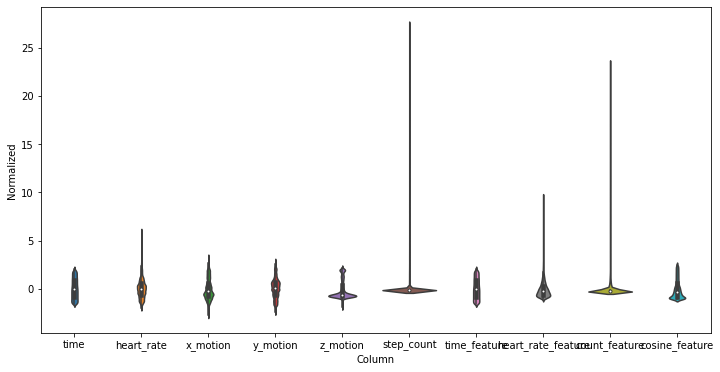

In [ ]:
df_std = (all_subjects_data_df[input_cols] - train_mean) / train_std

df_std = df_std.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))

ax = sns.violinplot(x='Column', y='Normalized', data=df_std)

---
---

# 7. Output the standardised data

---
---

Writing the train, validation and test set data to csv files

In [ ]:
std_train_df.to_csv('std_1_train.csv', index=False)
std_val_df.to_csv('std_1_val.csv', index=False)
std_test_df.to_csv('std_1_test.csv', index=False)

Write the full data to a csv file

In [ ]:
std_full_df.to_csv('std_1_full.csv', index=False)

---
---

# 8. Standardise all the data except the time_feature

---
---

### Standardise the train, validation, test and full dataframes

In [ ]:
# Only standardise feature columns
input_cols_2 = train_df.drop(columns=['time', 'time_feature', 'sleep_label', 'psg_label', 'subject_id']).columns

std_2_train_df, train_mean_2, train_std_2 = standardise(train_df, input_cols_2)
std_2_val_df, _, _ = standardise(val_df, input_cols_2, train_mean_2, train_std_2)
std_2_test_df, _, _ = standardise(test_df, input_cols_2, train_mean_2, train_std_2)
std_2_full_df, _, _ = standardise(all_subjects_data_df, input_cols_2, train_mean_2, train_std_2)

print("Mean:")
print(train_mean_2)
print("Standard Deviation:")
print(train_std_2)

Mean:
heart_rate            64.138695
x_motion              -0.113355
y_motion              -0.122823
z_motion              -0.389581
step_count             1.813057
heart_rate_feature     0.364680
count_feature          1.718910
cosine_feature        -0.778094
dtype: float64
Standard Deviation:
heart_rate            11.037470
x_motion               0.342122
y_motion               0.493472
z_motion               0.674002
step_count            11.737288
heart_rate_feature     0.332509
count_feature          6.674443
cosine_feature         0.211732
dtype: float64


### Look at these standardised dataframes

In [ ]:
std_2_train_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,1970-01-01 00:00:00,2.343046,-1.304122,1.648084,0.251126,8.607776,0,0.000000,0.480706,5.530874,2.452504,0,46343
1,1970-01-01 00:00:30,3.339652,-1.513119,1.612262,0.111929,4.815162,0,0.008333,0.451398,4.483025,2.442553,0,46343
2,1970-01-01 00:01:00,2.524247,-0.006384,1.979267,1.727603,0.891768,0,0.016667,0.398636,3.124169,2.432611,0,46343
3,1970-01-01 00:01:30,1.618243,-0.679271,-0.327864,1.896059,-0.154470,0,0.025000,0.374122,2.640312,2.422674,0,46343
4,1970-01-01 00:02:00,1.708843,-0.591184,-0.311630,1.923702,-0.154470,0,0.033333,0.354029,3.032657,2.412742,0,46343


In [ ]:
std_2_val_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
18085,1970-01-01 04:54:00,0.213935,-1.495124,0.498384,-0.562286,-0.15447,5,4.900000,0.192422,-0.257536,-1.046431,5,8000685
18086,1970-01-01 04:54:30,-0.012566,-1.500876,0.489463,-0.558278,-0.15447,5,4.908333,0.557916,-0.257536,-1.046691,5,8000685
18087,1970-01-01 04:55:00,0.757538,-1.497220,0.510753,-0.569202,-0.15447,5,4.916667,0.686721,-0.257536,-1.046927,5,8000685
18088,1970-01-01 04:55:30,0.576337,-1.516553,0.462067,-0.561459,-0.15447,5,4.925000,0.703659,-0.257536,-1.047140,5,8000685
18089,1970-01-01 04:56:00,-0.057866,-1.508682,0.465067,-0.560373,-0.15447,5,4.933333,0.704723,-0.257536,-1.047334,5,8000685


In [ ]:
std_2_test_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
23253,1970-01-01 00:17:30,-0.284367,-1.286817,0.891131,-0.572212,-0.15447,2,0.291667,-0.637137,-0.257536,2.108055,2,9106476
23254,1970-01-01 00:18:00,0.032734,-1.286729,0.883695,-0.574001,-0.15447,2,0.300000,-0.649877,-0.257536,2.098340,2,9106476
23255,1970-01-01 00:18:30,-0.103166,-1.291255,0.895584,-0.569009,-0.15447,3,0.308333,-0.685912,-0.257536,2.088630,3,9106476
23256,1970-01-01 00:19:00,-0.012566,-1.279770,0.894115,-0.570333,-0.15447,3,0.316667,-0.700504,-0.257536,2.078929,3,9106476
23257,1970-01-01 00:19:30,0.078035,-1.286973,0.885210,-0.568240,-0.15447,2,0.325000,-0.709255,-0.257536,2.069237,2,9106476


In [ ]:
std_2_full_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,1970-01-01 00:00:00,2.343046,-1.304122,1.648084,0.251126,8.607776,0,0.000000,0.480706,5.530874,2.452504,0,46343
1,1970-01-01 00:00:30,3.339652,-1.513119,1.612262,0.111929,4.815162,0,0.008333,0.451398,4.483025,2.442553,0,46343
2,1970-01-01 00:01:00,2.524247,-0.006384,1.979267,1.727603,0.891768,0,0.016667,0.398636,3.124169,2.432611,0,46343
3,1970-01-01 00:01:30,1.618243,-0.679271,-0.327864,1.896059,-0.154470,0,0.025000,0.374122,2.640312,2.422674,0,46343
4,1970-01-01 00:02:00,1.708843,-0.591184,-0.311630,1.923702,-0.154470,0,0.033333,0.354029,3.032657,2.412742,0,46343


---
---

# 9. Output version 2 of the standardised data

---
---

Writing the train, validation and test set data to csv files

In [ ]:
std_2_train_df.to_csv('std_2_train.csv', index=False)
std_2_val_df.to_csv('std_2_val.csv', index=False)
std_2_test_df.to_csv('std_2_test.csv', index=False)

Write the full data to a csv file

In [ ]:
std_2_full_df.to_csv('std_2_full.csv', index=False)